In [2]:
import numpy as np
import pandas as pd
import src.utils as utils

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Configuration File

In [3]:
config_data = utils.config_load()
config_data

{'raw_dataset_path': 'data/raw/data.csv',
 'data_set_path': 'data/output/data.pkl',
 'input_set_path': 'data/output/input.pkl',
 'output_set_path': 'data/output/output.pkl',
 'input_columns_path': 'data/output/input_columns.pkl',
 'train_set_path': ['data/output/X_train.pkl', 'data/output/y_train.pkl'],
 'valid_set_path': ['data/output/X_valid.pkl', 'data/output/y_valid.pkl'],
 'test_set_path': ['data/output/X_test.pkl', 'data/output/y_test.pkl'],
 'output_column': 'Class',
 'seed': 42,
 'test_size': 0.2,
 'standardizer_path': 'data/output/standardizer.pkl',
 'preprocessor_path': 'data/output/preprocessor.pkl',
 'train_clean_path': ['data/output/X_train_clean.pkl',
  'data/output/y_train_clean.pkl'],
 'valid_clean_path': ['data/output/X_valid_clean.pkl',
  'data/output/y_valid_clean.pkl'],
 'test_clean_path': ['data/output/X_test_clean.pkl',
  'data/output/y_test_clean.pkl']}

# Load Data

In [7]:
config_data['train_set_path'][0]

'data/output/X_train.pkl'

In [8]:
X_train = utils.pickle_load(config_data['train_set_path'][0])
y_train = utils.pickle_load(config_data['train_set_path'][1])

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (182276, 30)
y_train shape: (182276,)


In [9]:
data = pd.concat((X_train, y_train), axis=1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
272615,165180.0,-3.017333,3.215950,-2.844590,-1.341856,-0.491730,-1.776197,0.071360,1.470371,0.070087,...,0.258544,0.843397,0.086503,0.026228,0.082502,0.112516,0.618475,0.454782,0.77,0
191231,129171.0,2.099809,-0.890100,-2.817319,-1.208673,0.845043,0.138699,0.064751,-0.009282,-0.974776,...,0.567082,1.621804,-0.242970,-1.581675,0.522156,0.415164,-0.070427,-0.118390,48.00,0
53595,46061.0,0.812352,-0.586909,-0.667514,0.962864,0.401248,0.721682,0.343162,0.121239,0.059051,...,0.084476,-0.144437,-0.487009,-1.312940,0.806243,-0.202556,-0.027304,0.024049,230.57,0
193549,130180.0,-2.621263,-4.439432,-2.595440,-1.117193,2.489633,-2.625322,1.207772,-0.457577,-1.353822,...,1.265437,1.872310,1.862566,0.615607,-0.594514,-0.172620,0.199639,0.485647,588.15,0
207723,136809.0,2.227359,-1.572316,-0.371772,-1.578679,-1.593467,-0.157863,-1.598295,0.004422,-1.074622,...,0.089499,0.852866,0.098889,-0.305689,-0.178513,0.009100,0.045008,-0.053145,19.98,0


# EDA

### check data type

In [10]:
# Check datatype
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### check missing value

In [18]:
# Check missing value
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data.isna().sum().sum()

0

**Summary**

There are no missing values in our data ## yeaaay ##

### Check correlation

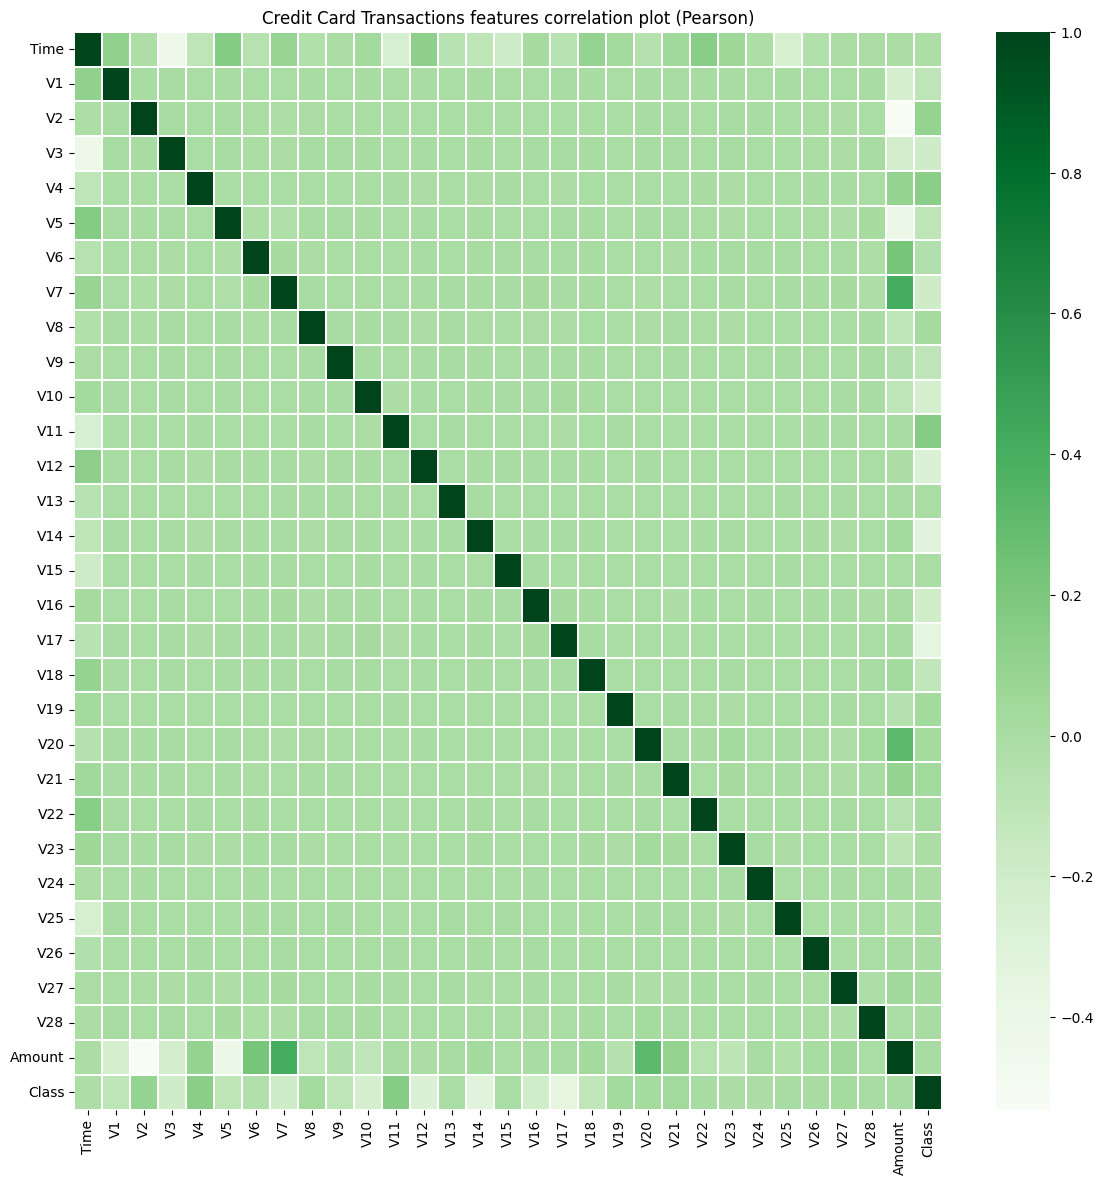

In [19]:
#Plotting a heatmap to visualize the correlation between the variables
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

### Check class balance

In [21]:
print(data['Class'].value_counts())
print('\n')
print(data['Class'].value_counts(normalize=True))

0    181946
1       330
Name: Class, dtype: int64


0    0.99819
1    0.00181
Name: Class, dtype: float64


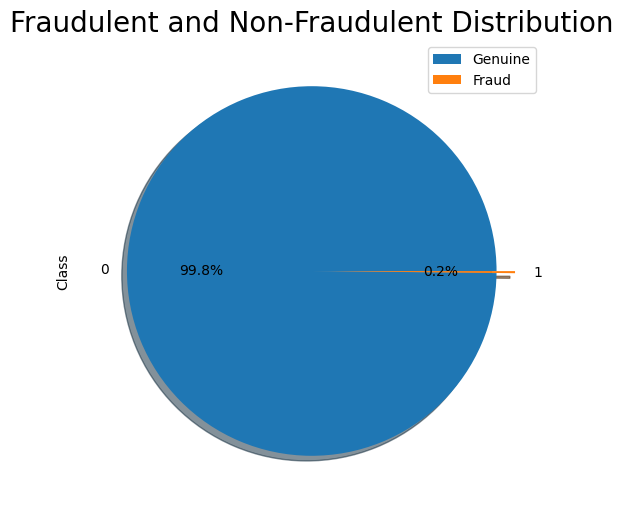

In [12]:
data["Class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Genuine", "Fraud"])
plt.show()

#### Descriptive statistics of time and amount columns

In [27]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [30]:
data[['Time','Amount']].describe()

,Time,Amount
count,182276.000000,182276.000000
mean,94769.394484,88.382430
std,47487.648118,253.722772
min,1.000000,0.000000
25%,54126.000000,5.640000
50%,84708.500000,21.980000
75%,139263.250000,76.732500
max,172792.000000,25691.160000


### Visualize Distribution

#### Column Amount

C:\Users\david\AppData\Local\Temp\ipykernel_1056\773175606.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], bins=100)


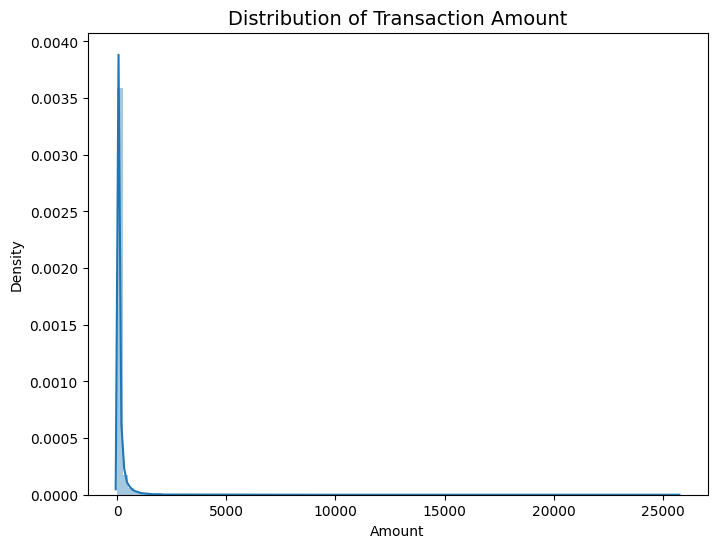

In [32]:
# column Amount
col = 'Amount'

plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(data[col], bins=100)
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_1056\1066421700.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'] == 1]['Amount'], bins=100, ax=axs[0])
C:\Users\david\AppData\Local\Temp\ipykernel_1056\1066421700.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Clas

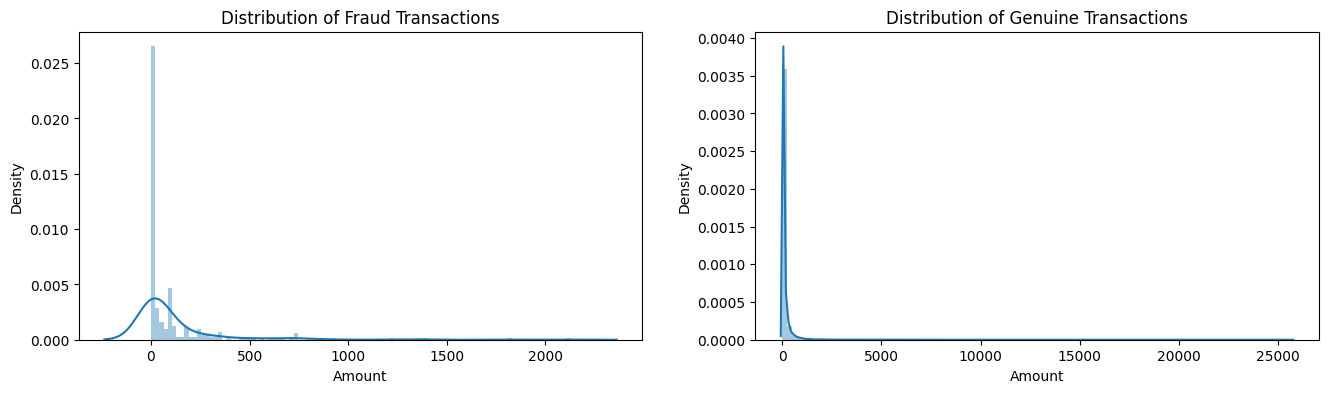

In [39]:
# Distribution of amount vs class
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(data[data['Class'] == 1]['Amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(data[data['Class'] == 0]['Amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

Fraudulent transaction seems happen for small tickets size, with biggest anomalous amounts being around 2000 dollars.

In [43]:
# check the amount distribution of fraud
print("Fraud Transaction distribution : \n",data[(data['Class'] == 1)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",data[(data['Class'] == 1)]['Amount'].max())
print("Minimum amount of fraud transaction - ",data[(data['Class'] == 1)]['Amount'].min())

Fraud Transaction distribution : 
 1.00     78
0.00     19
99.99    18
0.76     11
0.77      9
Name: Amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


Summary :

- big amount / outlier does not imply fraud
- most of the fraud data is for small transaction (even zero value transaction)

### Column Time

C:\Users\david\AppData\Local\Temp\ipykernel_1056\2787457939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], bins=100)


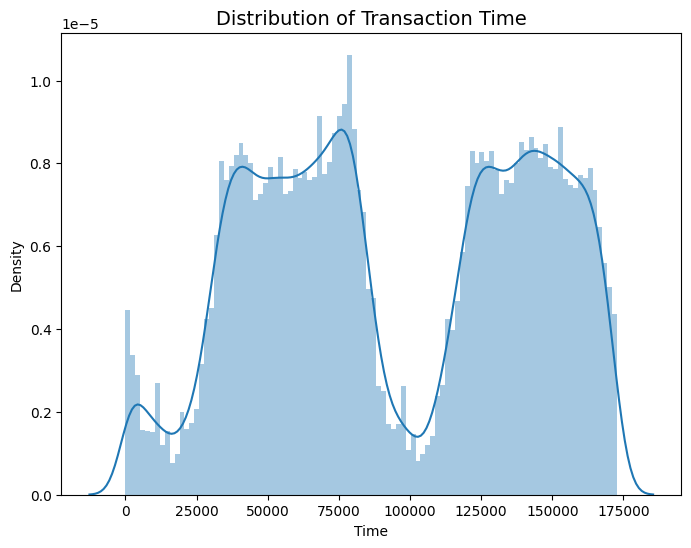

In [44]:
# column Time
col = 'Time'

plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(data[col], bins=100)
plt.show()

In [14]:
50000 / 3600

13.88888888888889

C:\Users\david\AppData\Local\Temp\ipykernel_19120\400924580.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'] == 1]['Time'], bins=100, ax=axs[0])
C:\Users\david\AppData\Local\Temp\ipykernel_19120\400924580.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'

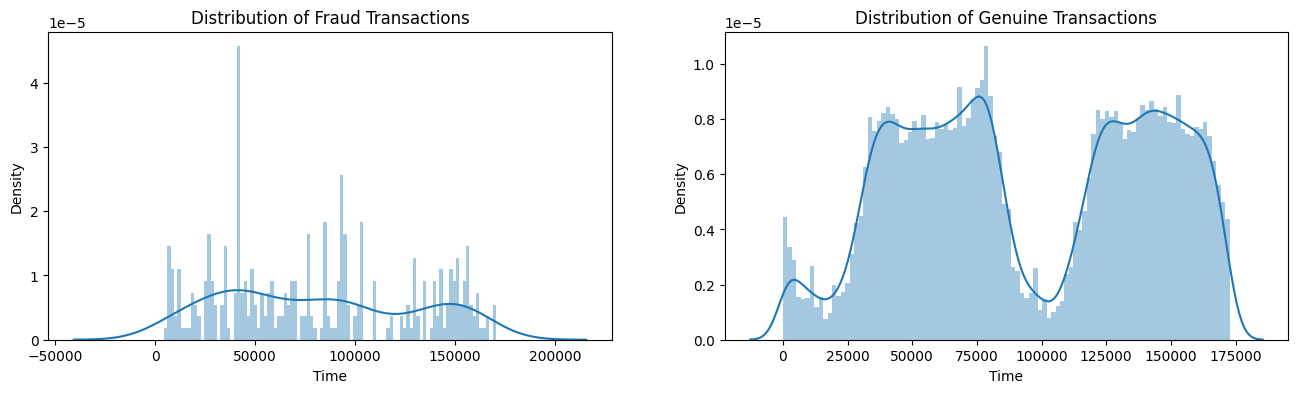

In [15]:
# Distribution of time vs class
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(data[data['Class'] == 1]['Time'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(data[data['Class'] == 0]['Time'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

In [16]:
40000/3600

11.11111111111111

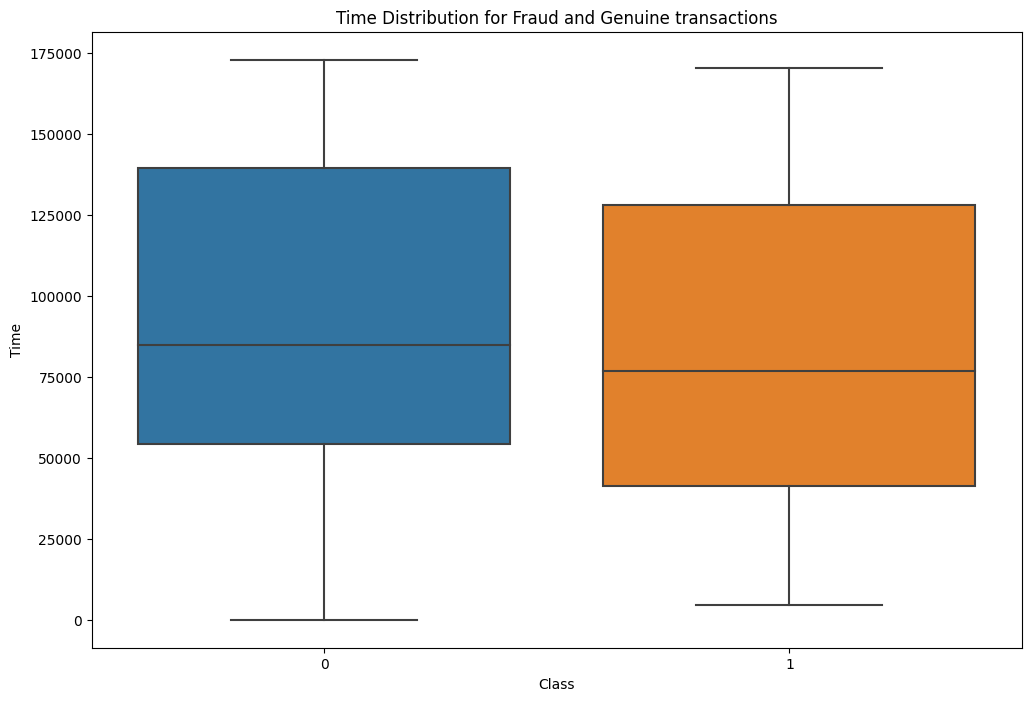

In [50]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Class', y='Time',data = data)

plt.title('Time Distribution for Fraud and Genuine transactions')
plt.show()

Summary :

- The data range between 0 and 175000
- There are 2 peaks, which might indicates the day/night cycle (more transaction is done during the night)

### Rest of the columns

C:\Users\david\AppData\Local\Temp\ipykernel_1056\226907285.py:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
C:\Users\david\AppData\Local\Temp\ipykernel_1056\226907285.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
C:\Users\david\AppData\Local\Temp\ipykernel_1056\226907285.py:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.

<Figure size 640x480 with 0 Axes>

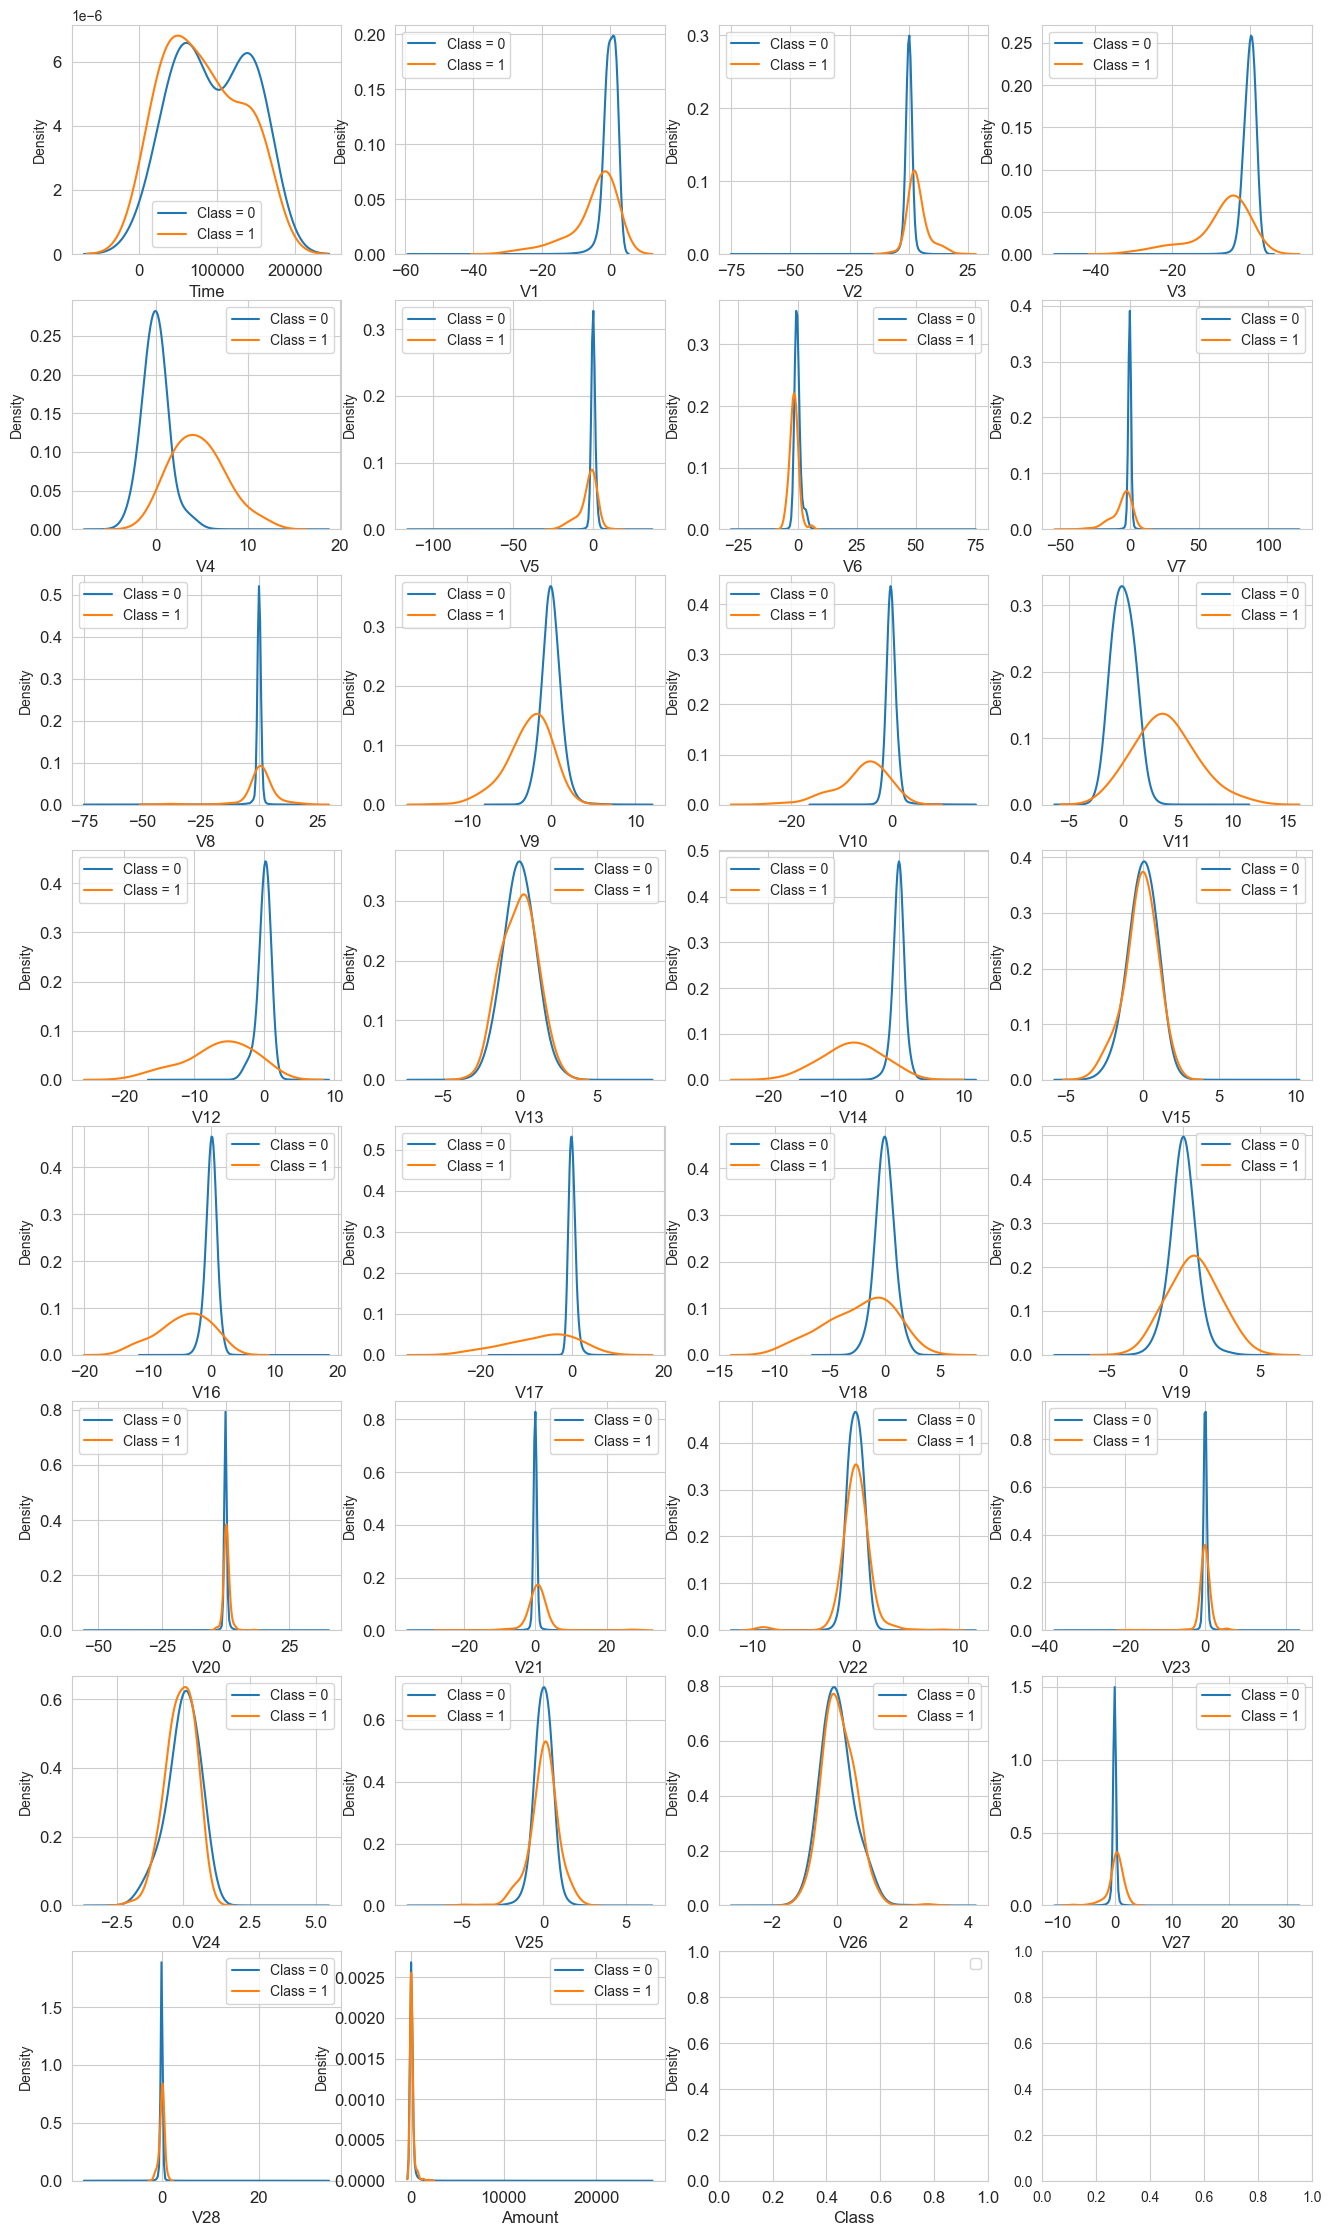

In [54]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()
plt.show()